https://21percentme.github.io/Milestone1

# Introduction

Group Members: Jason Li and Alex Motyka

For our project, we have found two pretty cool datasets that we wanted to look into. The first dataset is the Video Game Sales dataset. The other dataset is the 80 cereals dataset.

# Collaboration Plan:

We plan on meeting weekly via zoom, with a Github Repository as our main collaboraiton method. We may also use Google Collab, as it has been what we are using in class, but we will really only move if the Github Repository does not work out well. We are utilizing GroupMe and Texts to communicate for this project, as well as setting up a ToDo list in order to efficiently assign tasks to each group member.

In [2]:
#run if you are missing pandas:
#pip install pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Dataset 1: Video Game Sales (https://www.kaggle.com/datasets/gregorut/videogamesales)**

### Project Goals: 

We chose this dataset because video games have gained popluarity along the years, especially with the recent mobility aspects of concoles. From here, it would be interesting to see how different video games have sold over the past years, which games are the most popular, and see how sale trends correspond with real life events

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com, uploaded by GregorySmith


Fields include:

    Rank - Ranking of overall sales
    Name - The games name
    Platform - Platform of the games release (i.e. PC,PS4, etc.)
    Year - Year of the game's release
    Genre - Genre of the game
    Publisher - Publisher of the game
    NA_Sales - Sales in North America (in millions)
    EU_Sales - Sales in Europe (in millions)
    JP_Sales - Sales in Japan (in millions)
    Other_Sales - Sales in the rest of the world (in millions)
    Global_Sales - Total worldwide sales.

In [4]:
#read the video game sales csv into a dataframe
game_sales = pd.read_csv("vgsales.csv")
#display first 5 rows to see what the data looks like

game_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Right now we should start with cleaning the dataset up a bit, so lets check how manu null entries there are

In [5]:
#in here we sum up the number of null entries
game_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Looks like there are 271 null entries in year, so we do not know when 271 of the games were release. Additionally, 58 games have an unknown/unreported publisher. This may mess up our data analyzing, so lets just drop the entries with those null values. We are making sure to check that they were dropped.

In [6]:
#in hhere we drop all null values
games = game_sales.dropna()
#and we check to see if it worked below
games.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Lets start looking into some basic analysis of the data! Lets first look at some basic summary stats of the data.

In [7]:
#so here we see some basic summary stats
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


From here, we also look at what data types each variable is

In [8]:
#and call .info() to see the variable types
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Note that Platform, Genre, and Publisher are objects (strings). These variables are important to the questions we want to answer using this dataset, so we should consider turning these into individual binary columns based on the number of possible values.

The following histogram shows the distribution of games over time. It is easy to see how the number of video games on the market skyrocketed starting around 1995.

array([[<Axes: title={'center': 'Year'}>]], dtype=object)

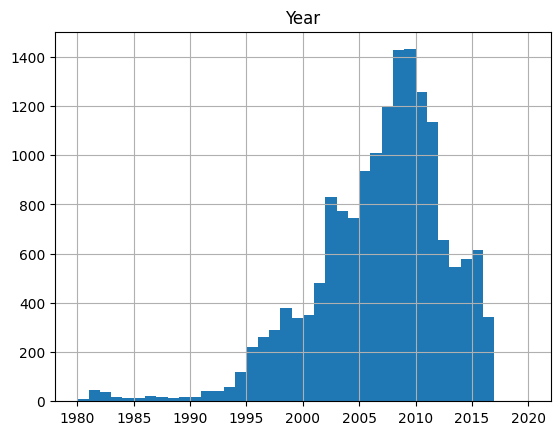

In [9]:
#and quickly see the sales by year in a histogram 
games.hist("Year", bins=40)

In [17]:
games.Year.max()

2020.0

In [18]:
games.Year.min()

1980.0

In [22]:
games.Genre.value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

It is cool to see the year video games sold the best is in 2020, and the worst in 1980, with the genre of action being the best selling.

Some questions we will investigate with this dataset: 
-How did the popularity of video game genres change over time?
-Were genres and games popular in North America similar to those popular in the EU and Japan? Did trends across regions occur in sync, or did they feature some lag with respect to region?
-How did the popularity of video game platforms change over time, and did these changes line up with major shifts in genre popularity?
Because each row breaks each game's sales down by region, and also includes platform, genre, and year information, we will be able to answer the above questions with this dataset.

## **Dataset 2: 80 Cereals (https://www.kaggle.com/datasets/crawford/80-cereals)**

This dataset is made by Chris Crawford, and contains the nutritional information on 80 different brands of cereals, taken from kaggle


Fields include:

    Name - Name of cereal
    mfr - Manufacturer of cereal
        A = American Home Food Products;
        G = General Mills
        K = Kelloggs
        N = Nabisco
        P = Post
        Q = Quaker Oats
        R = Ralston Purina
    type - 
        cold
        hot
    calories - calories per serving
    protein - grams of protein
    fat - grams of fat
    sodium - milligrams of sodium
    fiber - grams of dietary fiber
    carbo - grams of complex carbohydrates
    sugars - grams of sugars
    potass - milligrams of potassium
    vitamins - vitamins and minerals: 0, 25, or 100, indicating the typical percentage of FDA recommended
    shelf - display shelf (1, 2, or 3, counting from the floor)
    weight - weight in ounces of one serving
    cups - number of cups in one serving
    rating - a rating of the cereals (Possibly from Consumer Reports?)

This dataset was interesting to us because many of us grew up eating cereal as a breakfast food, or even as just a snack in many situations. There was always talks on what is a healthy cereal, and what is not, so it would be interesting to compare many popular cereal brand's nutritional facts and see how they actually compare.

In [11]:
cereal = pd.read_csv("cereal.csv")
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Let's check for null entries:

In [12]:
cereal.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

Looks like this dataset has no missing entries! Now, we will investigate basic summary stats:

In [13]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


And now the type of each variable:

In [14]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


There appears to be a negative correlation between the amount of sugar in a cereal and the rating of the cereal:

<Axes: xlabel='sugars', ylabel='rating'>

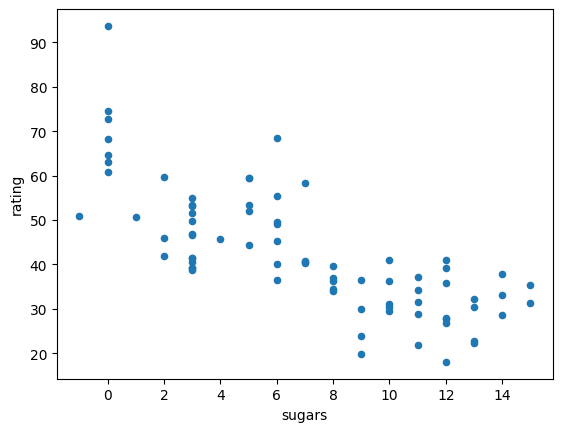

In [15]:
cereal.plot.scatter(x="sugars", y="rating")

We can confirm this using the "corr()" method, which shows that there is indeed a strong negative correlation:

In [16]:
cereal["sugars"].corr(cereal["rating"])

-0.7596746584301076

Some questions we want to answer using this dataset:
-How to levels of macronutrients and other dietary facts affect the rating of a cereal?
-Does a cereal's shelf location affect its rating? i.e. is a cereal placed at eye level more likely to recieve high/low reviews?